# Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, I will go through an example of a machine learning regression problem with the goal of predicting the sale price at auction of bulldozers.

## 1. Problem definition
REVISE
> How well can I predict the future auction price of bulldozers based off of previous auction prices of bulldozers with similar usage and configurations?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimizes RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/11N09C8ijqzMYzVJOH3bpCE9SAPfQJW_YenmeXmCUIlg/edit?usp=sharing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv('./data/bluebook-for-bulldozers/TrainAndValid.csv',
                 low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [6]:
df["UsageBand"].dtype

dtype('O')

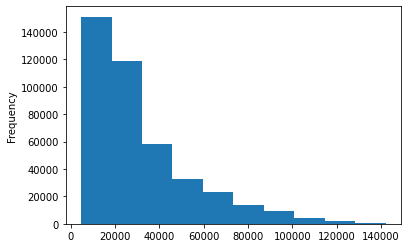

In [7]:
df.SalePrice.plot.hist();

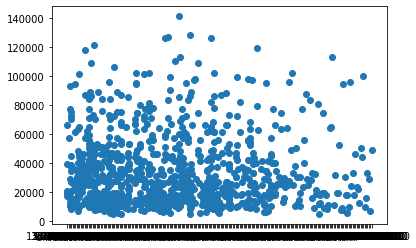

In [8]:
fig, ax = plt.subplots()
ax.scatter(df['saledate'][:1000], df['SalePrice'][:1000]);

## Parsing dates

In [9]:
# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [11]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

In [12]:
# Add the feature SaleYear so that we can use the bulldozers sold in 2012 as a validation set
df["saleYear"] = df.saledate.dt.year

In [13]:
df.saleYear.head(20)

0     2006
1     2004
2     2004
3     2011
4     2009
5     2008
6     2004
7     2005
8     2009
9     2007
10    2008
11    2006
12    2005
13    2006
14    2006
15    2006
16    2007
17    2010
18    2006
19    2005
Name: saleYear, dtype: int64

In [14]:
df.saleYear.tail(20)

412678    2012
412679    2012
412680    2012
412681    2012
412682    2012
412683    2012
412684    2012
412685    2012
412686    2012
412687    2012
412688    2012
412689    2012
412690    2012
412691    2012
412692    2012
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, dtype: int64

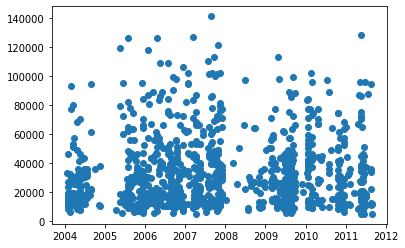

In [15]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

In [16]:
# Check the amount of sold bulldozers by State
df.state.value_counts()

Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virginia   

### Convert strings to categories

Next we'll use pandas categories to convert strings to numbers then fill missing values.

More info about compatibility with different data types here:
https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-realated-functionality

#### Define a function to transform all categorical variables of the entire dataset _including_ the test set.

This is to ensure that all categorical variables are encoded the same.

In [17]:
# encode all non-numeric variables and fill missing with 0
def encode_categorical(df_in):
    for label, content in df_in.items():
        if pd.api.types.is_string_dtype(content):
            # Add binary column to indicate whether sample originally had missing value
            df_in[label+"_is_missing"] = pd.isnull(content)
            # Turn categories into numbers and add 1
            df_in[label] = pd.Categorical(content).codes+1
    return df_in

##### Why +1?

In [18]:
# Missing values are stored as -1 and we want them to be 0
pd.Categorical(df["UsageBand"]).codes

array([ 1,  1,  0, ..., -1, -1, -1], dtype=int8)

In [19]:
pd.Categorical(df["UsageBand"]).codes+1

array([2, 2, 1, ..., 0, 0, 0], dtype=int8)

In [20]:
df_test = pd.read_csv('./data/bluebook-for-bulldozers/Test.csv',
                      low_memory=False,
                      parse_dates=["saledate"])

In [21]:
df_test["saleYear"] = df_test.saledate.dt.year

In [22]:
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688,28555,6038,8940,2286
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [23]:
# Make copies of the original dataframes and only manipulate the data on the copies.
# Notice that the Test set's shape is different since it's missing "salePrice"
df_tmp = df.copy()
df_test_tmp = df_test.copy()
df_tmp.shape, df_test_tmp.shape

((412698, 54), (12457, 53))

In [24]:
# Join the data frame but keep track of the two sets so we can easily split the df after encoding.
frames = [df_tmp, df_test_tmp]
df_joined = pd.concat(frames, keys=["a", "b"])

In [25]:
df_joined.sort_values(by=["saledate"], inplace=True, ascending=True)

In [26]:
df_joined.shape

(425155, 54)

In [27]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 425155 entries, ('a', 205615) to ('b', 9803)
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   425155 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 425155 non-null  int64         
 3   ModelID                   425155 non-null  int64         
 4   datasource                425155 non-null  int64         
 5   auctioneerID              405019 non-null  float64       
 6   YearMade                  425155 non-null  int64         
 7   MachineHoursCurrentMeter  149633 non-null  float64       
 8   UsageBand                 75504 non-null   object        
 9   saledate                  425155 non-null  datetime64[ns]
 10  fiModelDesc               425155 non-null  object        
 11  fiBaseModel               425155 non-null  objec

In [28]:
# Encode all categorical data
encode_categorical(df_joined)

SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
a 205615  1646770     9500.0    1126363     8434         132          18.0   
  76171   1364654    14000.0    1270628     7289         132          99.0   
  169757  1597053    12750.0    1100960     8180         132          99.0   
  115892  1453054    36000.0    1117184     3854         132          99.0   
  98567   1415950    40000.0    1142272     3357         132          99.0   
...           ...        ...        ...      ...         ...           ...   
b 9839    6618056        NaN    2297316      963         172           1.0   
  12162   6637910        NaN    2204199     9580         149           1.0   
  9582    6468570        NaN    2522968     7944         121           3.0   
  11350   6632096        NaN    2557856     4607         149           1.0   
  9803    6469532        NaN    2522919     5864         121           3.0   

          YearMade  MachineHoursCurrentMeter  UsageBand   saledate  ...  \
a 205615      1974                       NaN          0 1989-01-17  ...   
  76171       1968                       NaN          0 1989-01-31  ...   
  169757      1979                       NaN          0 1989-01-31  ...   
  115892      1977                       NaN          0 1989-01-31  ...   
  98567       1978                       NaN          0 1989-01-31  ...   
...            ...                       ...        ...        ...  ...   
b 9839        1996                       NaN          0 2012-11-15  ...   
  12162       2006                       NaN          0 2012-11-15  ...   
  9582        1000                       NaN          0 2012-11-15  ...   
  11350       2006                       NaN          0 2012-11-15  ...   
  9803        1998                       NaN          0 2012-11-16  ...   

          Undercarriage_Pad_Width_is_missing  Stick_Length_is_missing  \
a 205615                                True                     True   
  76171                                 True                     True   
  169757                                True                     True   
  115892                                True                     True   
  98567                                 True                     True   
...                                      ...                      ...   
b 9839                                  True                     True   
  12162                                 True                     True   
  9582                                 False                    False   
  11350                                 True                     True   
  9803                                  True                     True   

          Thumb_is_missing  Pattern_Changer_is_missing  \
a 205615              True                        True   
  76171               True                        True   
  169757              True                        True   
  115892              True                        True   
  98567               True                        True   
...                    ...                         ...   
b 9839                True                        True   
  12162               True                        True   
  9582               False                       False   
  11350               True                        True   
  9803                True                        True   

          Grouser_Type_is_missing  Backhoe_Mounting_is_missing  \
a 205615                     True                        False   
  76171                      True                         True   
  169757                     True                         True   
  115892                     True                         True   
  98567                      True                         True   
...                           ...                          ...   
b 9839                       True                         True   
  12162                      True                         True   
  95

In [29]:
# Example of a previously categorical feature
df_joined.state

a  205615    44
   76171      9
   169757     9
   115892     9
   98567      9
             ..
b  9839       3
   12162     38
   9582      51
   11350      3
   9803      20
Name: state, Length: 425155, dtype: int8

### Splitting data into training, validation and test sets

Now that the categorical variables are filled and encoded the same, it's time to split the data before filling in the missing numeric values. This is to ensure that the training set doesn't get filled using data from the validation and test sets.

In [30]:
df_encoded_test = df_joined.loc["b"]

In [31]:
df_encoded_test.head().T

,1203,1487,1225,1227,1459
SalesID,4282086,4325988,4285836,4286326,4321475
SalePrice,NaN,NaN,NaN,NaN,NaN
MachineID,2282684,2290978,1886561,2267831,2271472
ModelID,3537,22124,4149,85,4607
datasource,172,172,172,172,172
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,False,False,True,True
Blade_Type_is_missing,True,False,False,True,True
Travel_Controls_is_missing,True,False,False,True,True
Differential_Type_is_missing,True,True,True,False,True


In [32]:
df_encoded_test.shape

(12457, 98)

In [33]:
# Drop SalePrice, since it was only added when the dataframes were joined
# SalePrice is what the model will be trying to find.
df_encoded_test.drop("SalePrice", axis=1, inplace=True)

/home/blaze/miniconda3/envs/heart-disease/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
df_encoded_test.shape

(12457, 97)

In [35]:
df_encoded_train = df_joined.loc["a"]

In [36]:
df_encoded_train.shape

(412698, 98)

In [37]:
df_encoded_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 406167
Data columns (total 98 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   SalesID                             412698 non-null  int64         
 1   SalePrice                           412698 non-null  float64       
 2   MachineID                           412698 non-null  int64         
 3   ModelID                             412698 non-null  int64         
 4   datasource                          412698 non-null  int64         
 5   auctioneerID                        392562 non-null  float64       
 6   YearMade                            412698 non-null  int64         
 7   MachineHoursCurrentMeter            147504 non-null  float64       
 8   UsageBand                           412698 non-null  int8          
 9   saledate                            412698 non-null  datetime64[ns]
 10  fiM

In [38]:
# Delete the joined df to release memory
del df_joined

In [39]:
df_encoded_train.saledate.head(20)

205615   1989-01-17
76171    1989-01-31
169757   1989-01-31
115892   1989-01-31
98567    1989-01-31
127000   1989-01-31
28820    1989-01-31
101796   1989-01-31
75832    1989-01-31
55455    1989-01-31
92256    1989-01-31
115957   1989-01-31
92294    1989-01-31
92301    1989-01-31
55454    1989-01-31
127132   1989-01-31
81383    1989-01-31
142491   1989-01-31
54181    1989-01-31
28603    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [40]:
df_encoded_train.isna().sum()[:50]

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                        0
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc                  0
fiModelSeries                    0
fiModelDescriptor                0
ProductSize                      0
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                     0
Enclosure                        0
Forks                            0
Pad_Type                         0
Ride_Control                     0
Stick                            0
Transmission                     0
Turbocharged                     0
Blade_Extension     

In [41]:
# Split data into training and validation
df_train = df_encoded_train[df_encoded_train.saleYear != 2012]
df_val = df_encoded_train[df_encoded_train.saleYear == 2012]

len(df_train), len(df_val)

(401125, 11573)

In [42]:
df_train.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

df_val.to_csv("data/bluebook-for-bulldozers/val_tmp.csv",
              index=False)

df_encoded_test.to_csv("data/bluebook-for-bulldozers/test_tmp.csv",
                       index=False)

In [52]:
df_train = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                       low_memory=False,
                       parse_dates=["saledate"])

df_val = pd.read_csv("data/bluebook-for-bulldozers/val_tmp.csv",
                     low_memory=False,
                     parse_dates=["saledate"])

## 5. Modelling

### Define a function to pre-process our Training, Validation and Test sets

In [53]:
# Performs transformations on df and returns transformed df
def preprocess_data(df_in):
    # Add a few more datetime parameters for the saledate column
    df_in["saleMonth"] = df_in.saledate.dt.month
    df_in["saleDay"] = df_in.saledate.dt.day
    df_in["saleDayOfWeek"] = df_in.saledate.dt.dayofweek
    df_in["saleDayOfYear"] = df_in.saledate.dt.dayofyear
    
    # Remove saledate column since I've enriched the DataFrame with date time features
    df_in.drop("saledate", axis=1, inplace=True)

    # Fill missing numeric rows with the median value since median is more robust to outliers
    for label, content in df_in.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add binary column to indicate whether sample had missing value
                df_in[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df_in[label] = content.fillna(content.median())
    
    return df_in

### Explaining above function
I wanted to take some time to explain the steps I took to pre-process the data. For presentation purposes I will be displaying the original unchanged dataframe so that we can see how it appeared before pre-processing. That being said, no changes will be made during the next few cells.

In [54]:
# a reminder of what the original dataset looks like
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 54 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

#### Fill numeric values

In [56]:
# Find which columns are numeric
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear


In [57]:
# Example of a numeric column 
df.ModelID

0          3157
1            77
2          7009
3           332
4         17311
          ...  
412693    21435
412694    21436
412695    21435
412696    21435
412697    21436
Name: ModelID, Length: 412698, dtype: int64

In [58]:
# Check for which numeric columns have null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


Next, add a new column to differentiate which columns originally had missing values. For demonstration purposes, this is done in a markdown cell as to not change the original data.
```
df[label+"_is_missing"] = pd.isnull(content)
```

Fill in missing values with median value
```
df[label] = content.fillna(content.median())
```


### Preprocess the data
Now, that the function has been explained, let's use it to process our training and validation sets.

In [59]:
df_train = preprocess_data(df_train)

In [60]:
df_train.head().T

,0,1,2,3,4
SalesID,1646770,1364654,1597053,1453054,1415950
SalePrice,9500,14000,12750,36000,40000
MachineID,1126363,1270628,1100960,1117184,1142272
ModelID,8434,7289,8180,3854,3357
datasource,132,132,132,132,132
...,...,...,...,...,...
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1
saleDayOfYear,17,31,31,31,31
auctioneerID_is_missing,False,False,False,False,False


In [61]:
df_val = preprocess_data(df_val)

In [62]:
df_val.head().T

,0,1,2,3,4
SalesID,4449186,6305054,1222845,6282680,6258613
SalePrice,46173.2,64000,35000,42100,26800
MachineID,2318824,1851308,1032841,1543404,1810917
ModelID,26964,385,4701,1830,13260
datasource,173,149,121,149,149
...,...,...,...,...,...
saleMonth,1,1,1,1,1
saleDay,1,4,4,4,4
saleDayOfWeek,6,2,2,2,2
saleDayOfYear,1,4,4,4,4


In [64]:
# Check for missing data
df_train.isnull().sum()/len(df_train)

SalesID                                0.0
SalePrice                              0.0
MachineID                              0.0
ModelID                                0.0
datasource                             0.0
                                      ... 
saleDay                                0.0
saleDayOfWeek                          0.0
saleDayOfYear                          0.0
auctioneerID_is_missing                0.0
MachineHoursCurrentMeter_is_missing    0.0
Length: 103, dtype: float64

In [65]:
df_val.isnull().sum()/len(df_val)

SalesID                                0.0
SalePrice                              0.0
MachineID                              0.0
ModelID                                0.0
datasource                             0.0
                                      ... 
saleMonth                              0.0
saleDay                                0.0
saleDayOfWeek                          0.0
saleDayOfYear                          0.0
MachineHoursCurrentMeter_is_missing    0.0
Length: 102, dtype: float64

### Save the preprocessed data to external files

In [66]:
# Export current temporary dataframes for reference
df_train.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

df_val.to_csv("data/bluebook-for-bulldozers/val_tmp.csv",
              index=False)

In [67]:
# Import preprocessed data
df_train = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)

df_val = pd.read_csv("data/bluebook-for-bulldozers/val_tmp.csv",
                     low_memory=False)

In [68]:
df_train.head().T

,0,1,2,3,4
SalesID,1646770,1364654,1597053,1453054,1415950
SalePrice,9500,14000,12750,36000,40000
MachineID,1126363,1270628,1100960,1117184,1142272
ModelID,8434,7289,8180,3854,3357
datasource,132,132,132,132,132
...,...,...,...,...,...
saleDay,17,31,31,31,31
saleDayOfWeek,1,1,1,1,1
saleDayOfYear,17,31,31,31,31
auctioneerID_is_missing,False,False,False,False,False


In [69]:
df_val.head().T

,0,1,2,3,4
SalesID,4449186,6305054,1222845,6282680,6258613
SalePrice,46173.2,64000,35000,42100,26800
MachineID,2318824,1851308,1032841,1543404,1810917
ModelID,26964,385,4701,1830,13260
datasource,173,149,121,149,149
...,...,...,...,...,...
saleMonth,1,1,1,1,1
saleDay,1,4,4,4,4
saleDayOfWeek,6,2,2,2,2
saleDayOfYear,1,4,4,4,4


### Now that all values are numeric and none are missing, time to fit the model

In [70]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 101), (11573,))

In [71]:
# See which column is missing in the validation set
set(X_train.columns) - set(X_valid.columns)

{'auctioneerID_is_missing'}

In [72]:
# Manually adjust X_valid to have the auctioneerID_is_missing column
X_valid["auctioneerID_is_missing"] = False
X_valid.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,4449186,2318824,26964,173,99.0,1996,0.0,0,2301,713,...,False,False,True,True,1,1,6,1,False,False
1,6305054,1851308,385,149,99.0,2006,7500.0,1,3864,1405,...,True,True,True,True,1,4,2,4,False,False
2,1222845,1032841,4701,121,3.0,2002,8150.0,3,1005,308,...,True,True,False,False,1,4,2,4,False,False
3,6282680,1543404,1830,149,99.0,2004,4373.0,3,64,20,...,True,True,True,True,1,4,2,4,False,False
4,6258613,1810917,13260,149,99.0,2000,24.0,2,1132,329,...,True,True,True,True,1,4,2,4,False,False


In [73]:
# Make sure these are all sale prices
y_train

0          9500.0
1         14000.0
2         12750.0
3         36000.0
4         40000.0
           ...   
401120    24500.0
401121    13500.0
401122     9750.0
401123    12500.0
401124    18000.0
Name: SalePrice, Length: 401125, dtype: float64

In [74]:
y_valid

0        46173.2
1        64000.0
2        35000.0
3        42100.0
4        26800.0
          ...   
11568    36000.0
11569    53000.0
11570    11000.0
11571    37000.0
11572    26000.0
Name: SalePrice, Length: 11573, dtype: float64

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

CPU times: user 14min 24s, sys: 2.17 s, total: 14min 26s
Wall time: 42.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
# Score the model using R^2
model.score(X_valid, y_valid)

0.8737787023752539

### Build an evaluation function

In [78]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Create an RMSLE evaluation function to comply with competition rules
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create a function to evaluate model using a few different methods
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [79]:
show_scores(model)

{'Training MAE': 1578.7280000997198,
 'Valid MAE': 6094.344636654282,
 'Training RMSLE': 0.08422220665555658,
 'Valid RMSLE': 0.2522464306580932,
 'Training R^2': 0.9875403473792496,
 'Valid R^2': 0.8737787023752539}

### Tune hyperparameters using RandomizedSearchCV

In [110]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [25000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=55),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

In [90]:
%%time
# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 36.4min finished


CPU times: user 24min 57s, sys: 3min 43s, total: 28min 40s
Wall time: 36min 29s


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                  

In [91]:
rs_model.best_params_

{'n_estimators': 60,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_samples': 25000,
 'max_features': 'auto',
 'max_depth': None}

In [92]:
show_scores(model)

{'Training MAE': 1578.7280000997198,
 'Valid MAE': 6094.344636654282,
 'Training RMSLE': 0.08422220665555658,
 'Valid RMSLE': 0.2522464306580932,
 'Training R^2': 0.9875403473792496,
 'Valid R^2': 0.8737787023752539}

In [93]:
show_scores(rs_model)

{'Training MAE': 5157.088989520861,
 'Valid MAE': 6788.288280636561,
 'Training RMSLE': 0.24032182464494728,
 'Valid RMSLE': 0.2784572901661128,
 'Training R^2': 0.8778068726146796,
 'Valid R^2': 0.8489945645746593}

### Train a model with the best hyperparameters

In [106]:
# Instantiate a model with ideal hyperparameters found with RandomizedSearchCV
ideal_model = RandomForestRegressor(n_estimators=60,
                                    min_samples_split=10,
                                    min_samples_leaf=1,
                                    max_samples=None,
                                    max_features=0.5,
                                    max_depth=None,
                                    n_jobs=-1,
                                    random_state=55)

In [107]:
%%time

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 4min 10s, sys: 267 ms, total: 4min 10s
Wall time: 13.8 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=60, n_jobs=-1, oob_score=False,
                      random_state=55, verbose=0, warm_start=False)

In [108]:
show_scores(ideal_model)

{'Training MAE': 2589.621541149384,
 'Valid MAE': 5951.890949930072,
 'Training RMSLE': 0.12917707250792246,
 'Valid RMSLE': 0.24570983023261786,
 'Training R^2': 0.967918635859283,
 'Valid R^2': 0.8823285250059132}

In [109]:
show_scores(model)

{'Training MAE': 1578.7280000997198,
 'Valid MAE': 6094.344636654282,
 'Training RMSLE': 0.08422220665555658,
 'Valid RMSLE': 0.2522464306580932,
 'Training R^2': 0.9875403473792496,
 'Valid R^2': 0.8737787023752539}

In [114]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/test_tmp.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,4282086,2282684,3537,172,1.0,1994,10002.0,3,2012-05-01,756,...,True,True,True,True,True,True,True,True,True,True
1,4325988,2290978,22124,172,1.0,1995,4878.0,2,2012-05-01,1024,...,True,True,True,True,True,False,False,False,True,True
2,4285836,1886561,4149,172,1.0,1988,0.0,0,2012-05-01,2424,...,True,True,True,True,True,False,False,False,True,True
3,4286326,2267831,85,172,1.0,1993,6970.0,2,2012-05-01,1798,...,True,True,True,True,True,True,True,True,False,False
4,4321475,2271472,4607,172,1.0,2003,8019.0,1,2012-05-01,510,...,True,True,True,True,True,True,True,True,True,True


In [115]:
# Process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing
0,4282086,2282684,3537,172,1.0,1994,10002.0,3,756,245,...,True,True,True,True,True,5,1,1,122,False
1,4325988,2290978,22124,172,1.0,1995,4878.0,2,1024,311,...,False,False,False,True,True,5,1,1,122,False
2,4285836,1886561,4149,172,1.0,1988,0.0,0,2424,720,...,False,False,False,True,True,5,1,1,122,False
3,4286326,2267831,85,172,1.0,1993,6970.0,2,1798,537,...,True,True,True,False,False,5,1,1,122,False
4,4321475,2271472,4607,172,1.0,2003,8019.0,1,510,176,...,True,True,True,True,True,5,1,1,122,False


In [116]:
set(X_train.columns) - set(df_test.columns)

{'auctioneerID_is_missing'}

In [117]:
df_test['auctioneerID_is_missing'] = False

In [118]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,auctioneerID_is_missing
0,4282086,2282684,3537,172,1.0,1994,10002.0,3,756,245,...,True,True,True,True,5,1,1,122,False,False
1,4325988,2290978,22124,172,1.0,1995,4878.0,2,1024,311,...,False,False,True,True,5,1,1,122,False,False
2,4285836,1886561,4149,172,1.0,1988,0.0,0,2424,720,...,False,False,True,True,5,1,1,122,False,False
3,4286326,2267831,85,172,1.0,1993,6970.0,2,1798,537,...,True,True,False,False,5,1,1,122,False,False
4,4321475,2271472,4607,172,1.0,2003,8019.0,1,510,176,...,True,True,True,True,5,1,1,122,False,False


### Make predictions on test data

In [119]:
test_preds = ideal_model.predict(df_test)

In [120]:
test_preds

array([16878.64773027, 17541.48238757, 70771.53795415, ...,
       23398.0311757 , 28937.68823769, 49603.48848741])

In [123]:
# Format predictions into Kaggle's specifications
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalePrice"] = np.round(test_preds, 2)
df_preds

,SalesID,SalePrice
0,4282086,16878.65
1,4325988,17541.48
2,4285836,70771.54
3,4286326,65838.62
4,4321475,26934.41
...,...,...
12452,6618056,12904.85
12453,6637910,11886.68
12454,6468570,23398.03
12455,6632096,28937.69


In [124]:
# Export Prediction data
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv",
                index=False)

### Feature Importance

In [125]:
# Find feature importance of the best model
ideal_model.feature_importances_

array([3.59785852e-02, 1.80234319e-02, 4.45093247e-02, 1.84175817e-03,
       3.79857488e-03, 1.97770409e-01, 3.44036674e-03, 1.12200034e-03,
       4.86861881e-02, 4.58673498e-02, 6.50037097e-02, 4.83487175e-03,
       1.54162415e-02, 1.54458728e-01, 4.13760994e-02, 6.88510576e-03,
       3.60726435e-03, 3.51933685e-03, 2.42798674e-03, 6.60655099e-02,
       5.40431375e-04, 2.67022748e-04, 1.13336493e-03, 2.21228898e-04,
       1.50968725e-03, 2.62307474e-05, 1.70570202e-03, 5.82124383e-03,
       5.75534717e-04, 1.44205717e-03, 5.64452375e-03, 3.99913268e-03,
       4.28582622e-03, 5.38787277e-04, 1.63344086e-03, 1.13393114e-02,
       9.12238597e-04, 1.15491651e-02, 2.05861147e-03, 1.58063119e-03,
       1.29767817e-03, 9.40921653e-04, 3.66524732e-03, 6.52058796e-04,
       8.31444700e-04, 4.08807999e-04, 2.84231701e-04, 2.21039323e-03,
       1.02389305e-03, 4.10173429e-04, 2.79466566e-04, 7.34000923e-02,
       4.20034228e-04, 0.00000000e+00, 0.00000000e+00, 1.79545599e-03,
      

In [130]:
# Define a function to plot feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

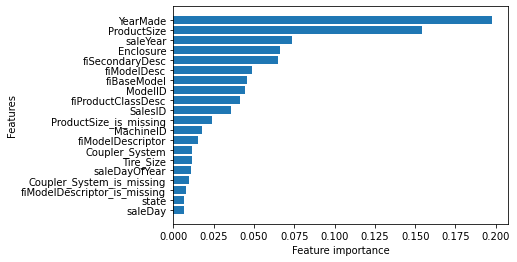

In [131]:
plot_features(X_train.columns, ideal_model.feature_importances_)